In [61]:
#se importan las librerias para la lectura 
#y procesamiento preliminar de los datos

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn= warn

import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
import statsmodels.api as sm 

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

In [63]:
Filepath= r"Dataset.csv"
df=pd.read_csv(Filepath)
print(df.head())

                      Time  Latitude  Longitude  Depth/Km  Magnitude
0  2016-08-24 03:36:32.000   42.6983    13.2335       8.1        6.0
1  2016-08-24 03:37:26.580   42.7123    13.2533       9.0        4.5
2  2016-08-24 03:40:46.590   42.7647    13.1723       9.7        3.8
3  2016-08-24 03:41:38.900   42.7803    13.1683       9.7        3.9
4  2016-08-24 03:42:07.170   42.7798    13.1575       9.7        3.6


In [64]:
Dft=df
Dft.index=pd.to_datetime(Dft['Time'])

In [65]:
Dft.head()

,Time,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,,
2016-08-24 03:36:32.000,2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


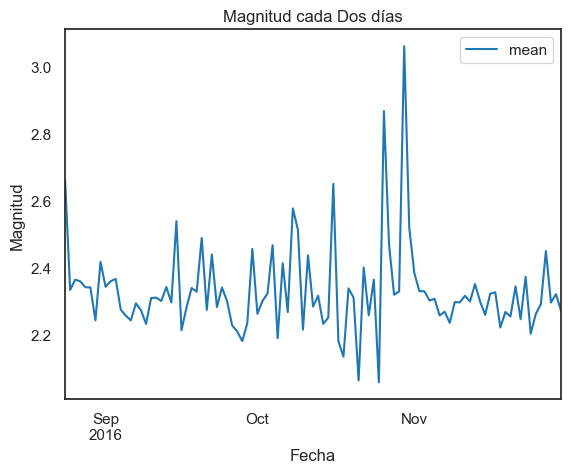

In [66]:
Dft["Magnitude"].resample("1D").apply([np.mean]).plot(label='Magnitud promedio')
plt.title("Magnitud cada Dos días")
plt.ylabel("Magnitud")
plt.xlabel("Fecha")
plt.savefig("SerieTiempo.png")

In [67]:
df['Time']=pd.to_datetime(df['Time'])

VentanaTiempo= '10D'
Dfagrup = df.groupby(pd.Grouper(key='Time', freq=VentanaTiempo))
IndiceVentana=0


In [68]:
#Dfagrup.head()

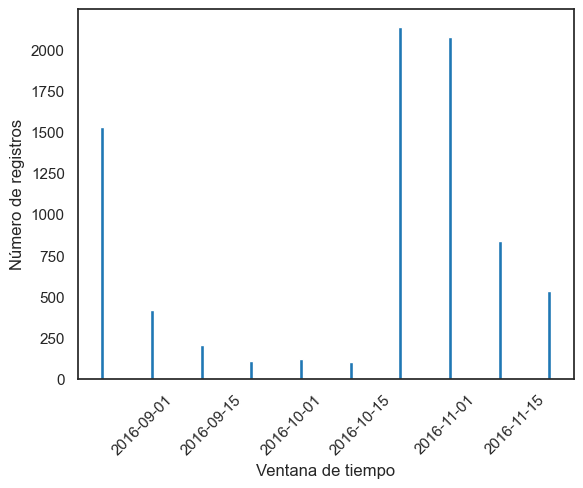

In [69]:
# Obtener el conteo de registros por grupo
group_counts = Dfagrup.size()

# Visualizar el conteo de registros en un gráfico de barras
plt.bar(group_counts.index, group_counts.values)
plt.xlabel('Ventana de tiempo')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.show()

Time
2016-08-24    AxesSubplot(0.125,0.2;0.775x0.68)
2016-09-03    AxesSubplot(0.125,0.2;0.775x0.68)
2016-09-13    AxesSubplot(0.125,0.2;0.775x0.68)
2016-09-23    AxesSubplot(0.125,0.2;0.775x0.68)
2016-10-03    AxesSubplot(0.125,0.2;0.775x0.68)
2016-10-13    AxesSubplot(0.125,0.2;0.775x0.68)
2016-10-23    AxesSubplot(0.125,0.2;0.775x0.68)
2016-11-02    AxesSubplot(0.125,0.2;0.775x0.68)
2016-11-12    AxesSubplot(0.125,0.2;0.775x0.68)
2016-11-22    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: 10D, Name: Magnitude, dtype: object

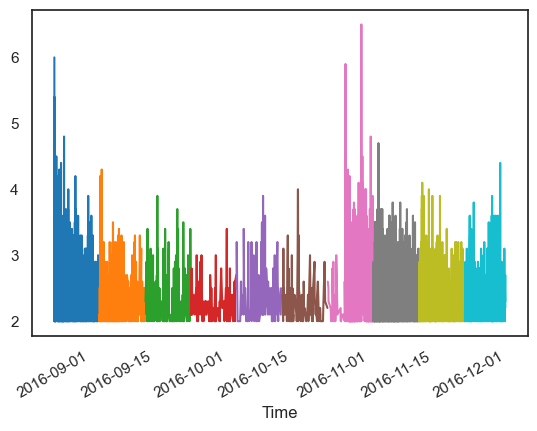

In [70]:
Dfagrup['Magnitude'].plot()

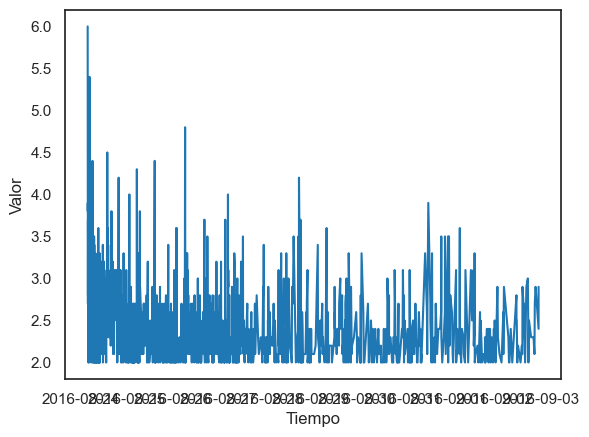

In [71]:
window_size = '10D'
grouped = df.groupby(pd.Grouper(key='Time', freq=window_size))

# Seleccionar una ventana específica (por ejemplo, la primera ventana)
window_index = 0
window_data = grouped.get_group(list(grouped.groups.keys())[window_index])

# Desplegar la serie de tiempo de la ventana seleccionada
plt.plot(window_data['Time'], window_data['Magnitude'])
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()

## Agrupación sobre datos en crudo

In [72]:
df.head()

,Time,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,,
2016-08-24 03:36:32.000,2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


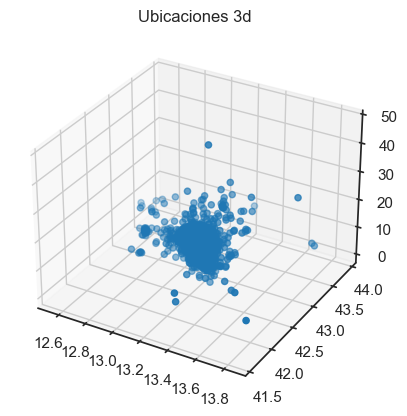

In [73]:
distri= plt.axes(projection="3d")
distri.scatter3D(df['Longitude'],df['Latitude'],df['Depth/Km'])
distri.set_title('Ubicaciones 3d')
plt.show()

In [74]:
XN=df.iloc[:,[1,2,3,4]]

In [75]:
XN.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [76]:
Scaler=StandardScaler().fit(XN)
XN_es=Scaler.transform(XN)

In [101]:
XN_es
#df['Time']=pd.to_datetime(df['Time'])

In [111]:
arraytime=np.array(df['Time'], dtype='datetime64')
print(arraytime)

['2016-08-24T03:36:32.000000000' '2016-08-24T03:37:26.580000000'
 '2016-08-24T03:40:46.590000000' ... '2016-11-30T20:18:27.550000000'
 '2016-11-30T20:45:11.780000000' '2016-11-30T20:54:35.890000000']


In [107]:
#TimeXN_es=np.column_stack((XN_es))

In [27]:
#TimeXN_es[:,4]

In [28]:
inertia=[]
numCluster=list(range(1,11))
for k in numCluster:
    km=KMeans(n_clusters=k)
    km.fit(XN_es)
    inertia.append(km.inertia_)

Text(0, 0.5, 'Inercia')

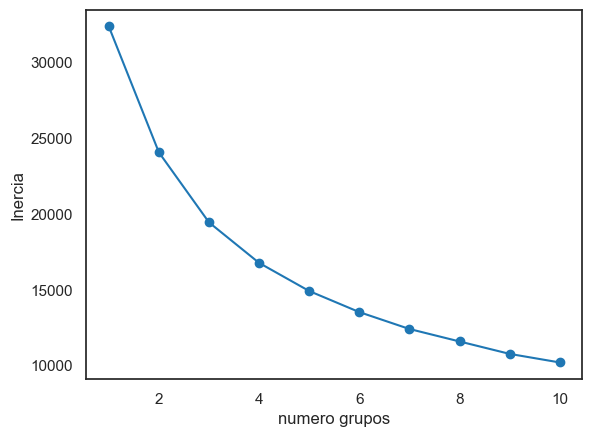

In [29]:
y=np.linspace(1,10)
plt.scatter(numCluster,inertia)
plt.plot(numCluster,inertia)
plt.xlabel('numero grupos')
plt.ylabel('Inercia')

In [30]:
kmd=KMeans(n_clusters=3)
kmd.fit(XN_es)

KMeans(n_clusters=3)

In [31]:
XN_es

array([[-1.04238786,  0.87253243, -0.85159024,  8.44750587],
       [-0.93120583,  1.11093433, -0.44136718,  4.92930712],
       [-0.5150674 ,  0.13565382, -0.1223048 ,  3.28748103],
       ...,
       [ 1.42664725, -0.38810794, -0.89717058, -0.46526431],
       [ 1.51003377, -0.71440549, -0.30462616,  0.70746861],
       [ 1.30196455, -1.0322747 , -0.21346548, -0.23071773]])

In [32]:
labels=kmd.labels_

In [33]:
XN_esla= np.column_stack((XN_es, labels))

In [34]:
etiquetas=set(labels)
neti=len(etiquetas)

In [35]:
print(etiquetas)

{0, 1, 2}


In [112]:
XN_esla
nombreCol= ['LatitudNorm','LongitudNorm','DeptNorm','MagnitudNorm','Label']
dfNL=pd.DataFrame(XN_esla, columns=nombreCol)
dfNL['Time']=pd.to_datetime(arraytime)

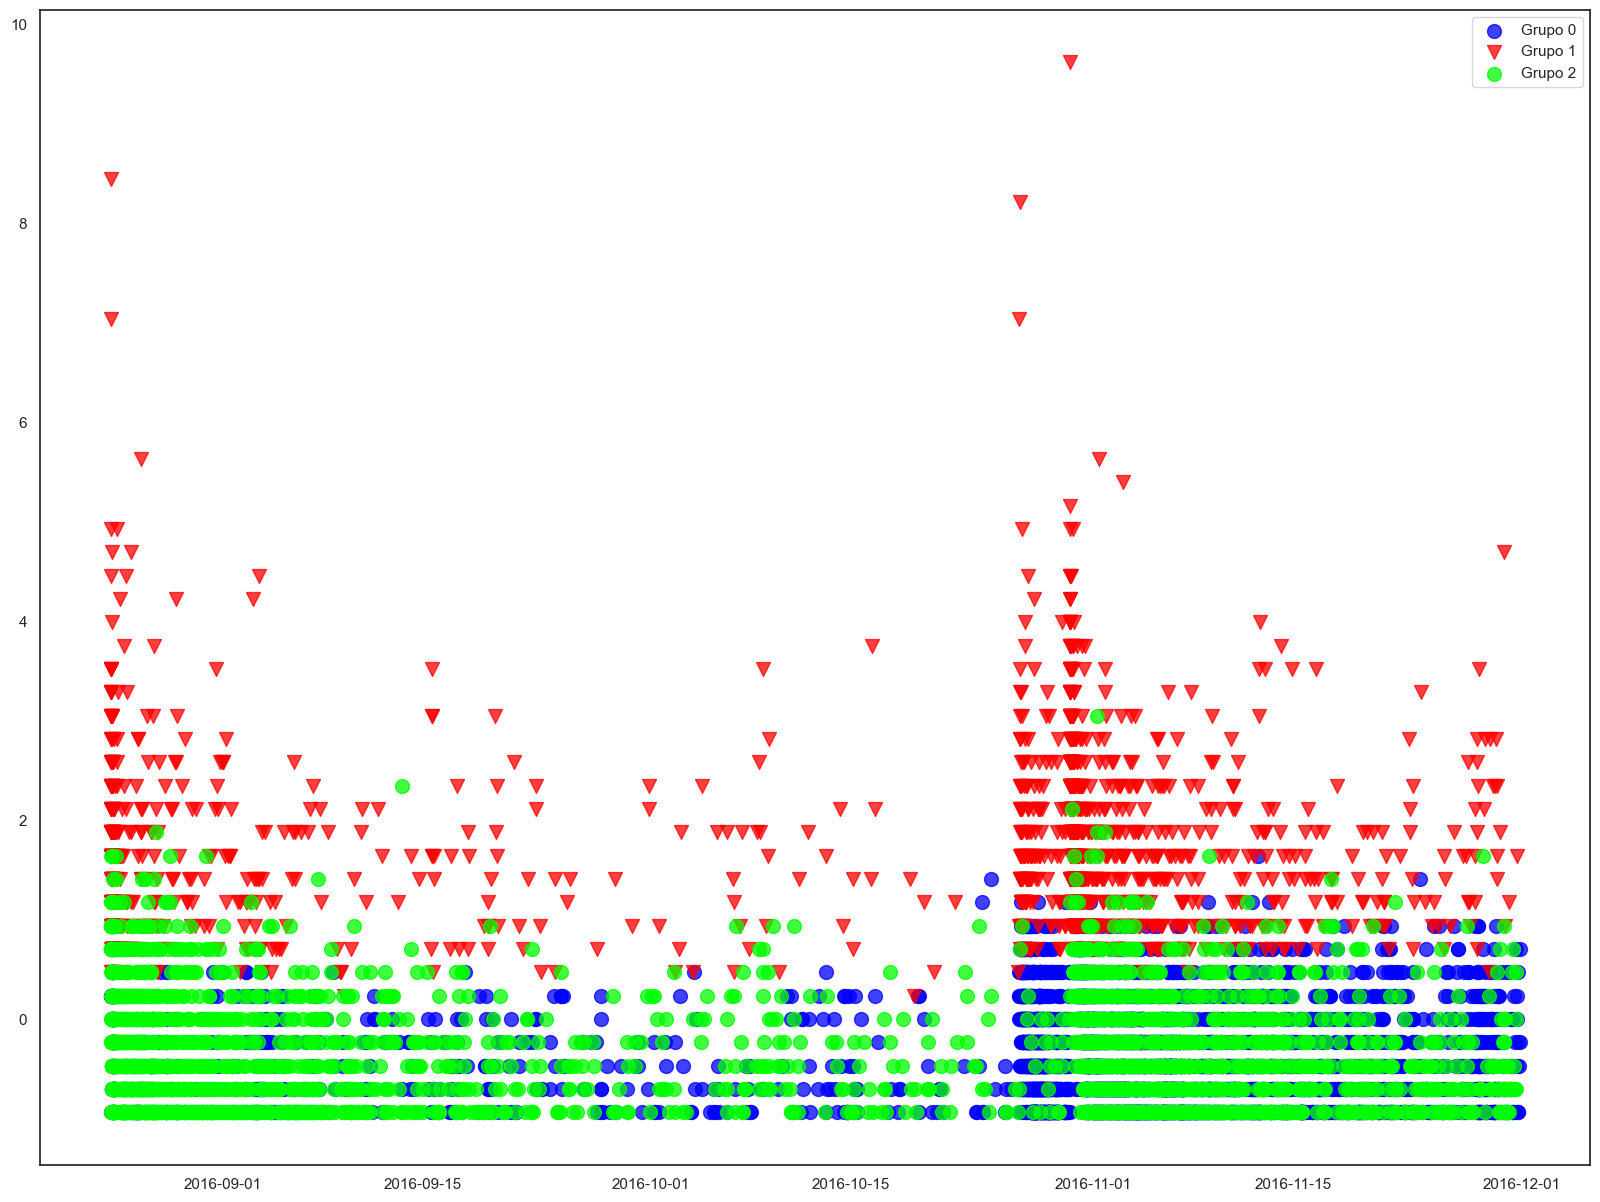

In [115]:
cmap=plt.cm.get_cmap('brg',neti)
# formato de la figura
plt.rcParams['figure.figsize'] = (20,15)
for l in etiquetas:
            plt.scatter(
                #df['Time'][kmd.labels_==l],
                #df['Magnitude'][kmd.labels_==l],
                dfNL['Time'][kmd.labels_==l],
                dfNL['MagnitudNorm'][kmd.labels_==l],
                # los colores se eligen por iteracion del mapa de calor como el valor -1 no se toma en cmap se 
                # clasifica directamente como negro
                c=[cmap(l)],
                marker='ov'[l%2],
                alpha=0.75,
                s=100,
                # se imprimen los clusters y -1 se clasifica diretametne como ruido
                label=f'Grupo {l}')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [109]:
dfNL

,LatitudNorm,LongitudNorm,DeptNorm,MagnitudNorm,Label,Time
0,-1.042388,0.872532,-0.851590,8.447506,1.0,2016-08-24 03:36:32.000
1,-0.931206,1.110934,-0.441367,4.929307,1.0,2016-08-24 03:37:26.580
2,-0.515067,0.135654,-0.122305,3.287481,1.0,2016-08-24 03:40:46.590
3,-0.391179,0.087492,-0.122305,3.522028,1.0,2016-08-24 03:41:38.900
4,-0.395150,-0.042546,-0.122305,2.818388,1.0,2016-08-24 03:42:07.170
...,...,...,...,...,...,...
8081,0.482394,-1.701727,0.333499,-0.934357,0.0,2016-11-30 18:39:27.600
8082,0.911239,0.472788,-0.623689,0.472922,0.0,2016-11-30 18:43:14.850
8083,1.426647,-0.388108,-0.897171,-0.465264,0.0,2016-11-30 20:18:27.550
8084,1.510034,-0.714405,-0.304626,0.707469,0.0,2016-11-30 20:45:11.780


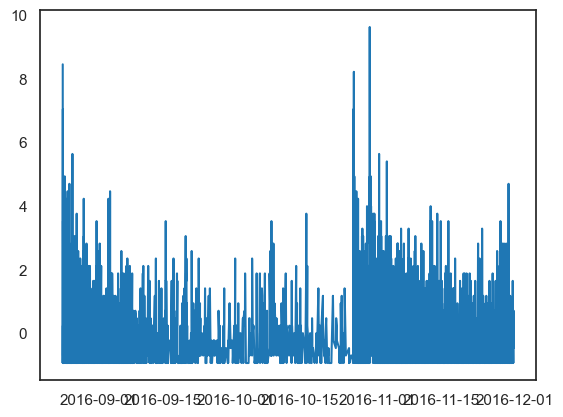

In [122]:
plt.plot(dfNL['Time'],dfNL['MagnitudNorm'])

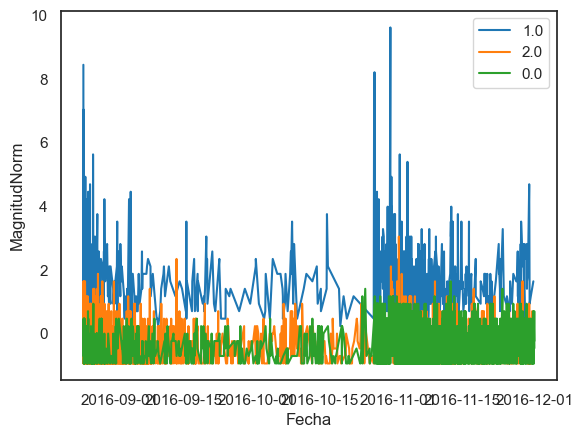

In [127]:
fig, ax = plt.subplots()

for label in dfNL['Label'].unique():
    subset=dfNL[dfNL['Label']==label]
    ax.plot(subset['Time'], subset['MagnitudNorm'], label=label)
ax.legend()
plt.xlabel('Fecha')
plt.ylabel('MagnitudNorm')
plt.show()